![](https://github.com/IntelRealSense/librealsense/raw/master/doc/img/realsense.png)


## Introduction

The notebook offers a quick hands-on introduction to Intel RealSense Depth-Sensing technology. 

> **Have a Question?** [Open new issue on our GitHub](https://github.com/IntelRealSense/librealsense/issues/new)

## The Tools
We are planning to use the following packages:

In [4]:
!pip install opencv-python
!pip install matplotlib
!pip install pyntcloud


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/346.3 kB ? eta -:--:--
     ------------------------------------- 346.3/346.3 kB 10.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
      --------------------------------------- 0.5/41.2 MB 16.0 MB/s eta 0:00:03
      --------------------------------------- 0.9/41.2 MB 14.1 MB/s eta 0:00:03
     - -------------------------------------- 1.0/41.2 MB 11.0 MB/s eta 0:00:04
     - -------------------------------------- 1.2/41.2 MB 7.6 MB/s eta 0:00:06
     - -------------------------------------- 1.6/41.2 MB 8.6 MB/s eta 0:00:05
     -- ------------------------------------- 2.2/41.2 MB 9.2 MB/s eta 0:00:05
     -- ------------------------------------- 2.4/41.2 MB 8.5 MB/s eta 0:00:05
     --- ------------------------------------ 3.1/41.2 MB 10.0 MB/s eta 0:00:04
     --- ------------------------------------ 3.8/41.2 MB 10.6 MB/s eta 0:00:04
     ---- ----------------------------------- 4.7/41.2 MB 1


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promo

In [2]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
from pyntcloud import PyntCloud # open source library for 3D pointcloud visualisation
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


## The API
Next, we will open depth and RGB streams from pre-recorded file and capture a set of frames:


In [18]:
# Setup:
pipe = rs.pipeline()
cfg = rs.config()
profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()
  
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

pc = rs.pointcloud();
pc.map_to(color_frame);
pointcloud = pc.calculate(depth_frame);

vertices = np.asanyarray(pointcloud.get_vertices()).view(np.float32).reshape(-1, 3)
filtered_vertices = vertices[vertices[:, 2] > -20]

print(filtered_vertices)

# Cleanup:
pipe.stop()
print("Frames Captured")

[[-0. -0.  0.]
 [-0. -0.  0.]
 [-0. -0.  0.]
 ...
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
Frames Captured


## RGB Data
Let's start with accessing the color componnent of the frameset:

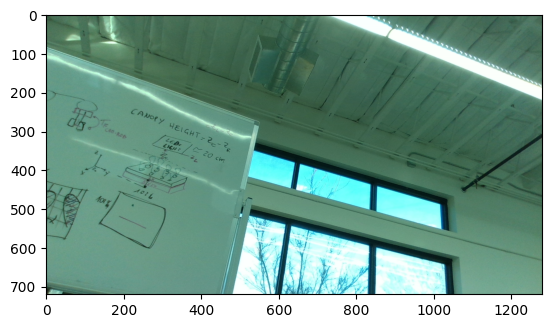

In [19]:
color = np.asanyarray(color_frame.get_data())
plt.rcParams["axes.grid"] = False
plt.imshow(color)

## Depth Data
Now, we will visualize the depth map captured by the RealSense camera:

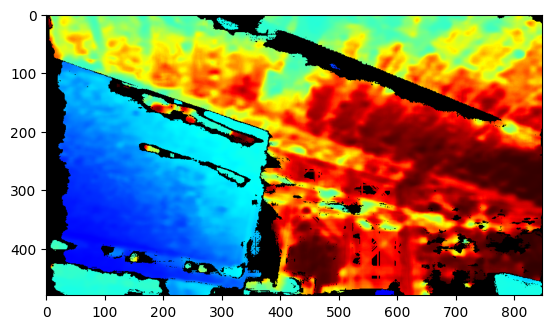

In [20]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
plt.imshow(colorized_depth)

## Point-Cloud

The SDK provides `pointcloud` primitive that can convert RGB-D image data into 3D point-cloud (a set of {X,Y,Z}) values. This cloud can be exported into PLY and rendered using various tools.

In [21]:
import open3d as o3d

# Create an Open3D point cloud object
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(filtered_vertices)

# Write the point cloud to a PLY file
o3d.io.write_point_cloud("filtered.ply", pcd)

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd])


> **Want to learn more?** Visit [realsense.intel.com](http://realsense.intel.com) and [github.com/IntelRealSense](http://www.github.com/IntelRealSense/librealsense)